<a href="https://colab.research.google.com/github/convin305/sum_petitions/blob/master/%5B%EA%B3%B5%EB%AA%A8%EC%A0%84%5D%EC%A0%84%EC%A3%BC%EC%8B%9C%20%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0/%EC%A7%80%EB%A6%AC%20%ED%86%B5%EA%B3%84%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python 패키지 설치

In [ ]:
from google.colab import output

In [ ]:
! pip install xmltodict

In [ ]:
! pip install geopandas

output.clear()

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import json
import xmltodict
import folium
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from folium import plugins
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, quote
from matplotlib import rc

In [ ]:
plt.style.use('seaborn')

In [ ]:
## matplotlib 사용시 한국어 나오게 하는 코드
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9).get_name()
rc('font',family = font)


fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

output.clear()

In [ ]:
from pyproj import Proj, transform
from shapely.geometry import Polygon, Point, MultiPolygon
from shapely.wkt import loads

In [ ]:
from fiona.crs import from_epsg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 연계 : 아이돌봄

In [ ]:
# 	여성가족부_아이돌봄 월별가정실적현황 정보 서비스
# 전주시 : C0408
# 군산시 : C0397
# 익산시 : C0405
base = 'http://apis.data.go.kr/1383000/idis/incomeListService/getIncomeList?serviceKey=V3pgDw4Na%2BC2XkjtjQzQ1Co6xR9HCnU3pJw4lPUNX4TU3RdZXu7%2FX60NUnj9UOWrbTpukrfudRi1baplWwp7%2BQ%3D%3D&pageNo=1&type=xml&numOfRows=100000&crtrYmFrom=201701&crtrYmTo=202104&childCareInstNo=C0408'
parameters = ''
url = base 

# header = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"}
request = Request(url)
response = urlopen(request)
rescode = response.getcode()

if rescode == 200:
  response_body = response.read().decode('utf-8')
else:
  print('error code : {}'.format(rescode))

jsonData = json.loads(json.dumps(xmltodict.parse(response_body)))
df_childcare = pd.DataFrame(jsonData['response']['body']['items']['item'])

In [ ]:
df_childcare.rename(columns={'careDvsnNm':'돌봄구분명',
                             'srvcDvsfctnNm':'서비스다양화명',
                             'linkFmlyCnt':'연계가정수', 
                             'linkAtypeFmlyCnt':'연계가형가정수',
                             'linkBtypeFmlyCnt':'연계나형가정수',
                             'linkCtypeFmlyCnt':'연계다형가정수',
                             'linkDtypeFmlyCnt':'연계라형가정수',
                             'aplyFmlyCnt':'신청가정수',
                             'aplyAtypeFmlyCnt':'신청가형가정수',
                             'aplyBtypeFmlyCnt':'신청나형가정수',
                             'aplyCtypeFmlyCnt':'신청다형가정수',
                             'aplyDtypeFmlyCnt':'신청라형가정수',
                             'newLinkFmlyCnt':'신규연계가정수',
                             'newLinkAtypeFmlyCnt':'신규연계가형가정수',
                             'newLinkBtypeFmlyCnt':'신규연계나형가정수',
                             'newLinkCtypeFmlyCnt':'신규연계다형가정수',
                             'newLinkDtypeFmlyCnt':'신규연계라형가정수',
                             'dataCrtrYmd':'데이터기준일자'
                             }, inplace=True)

In [ ]:
df_childcare.head()

,crtrYm,childCareInstNo,childCareInstNm,ilnsSrvcYn,돌봄구분명,서비스다양화명,upChildCareInstNo,upChildCareInstNm,연계가정수,연계가형가정수,연계나형가정수,연계다형가정수,연계라형가정수,신청가정수,신청가형가정수,신청나형가정수,신청다형가정수,신청라형가정수,신규연계가정수,신규연계가형가정수,신규연계나형가정수,신규연계다형가정수,신규연계라형가정수,데이터기준일자
0,202001,C0408,전북 전주시 건강가정지원센터,N,시간제,일반형,C0503,전라북도 광역거점,548,358,86,22,82,548,358,86,22,82,5,3,1,0,1,20210318
1,202001,C0408,전북 전주시 건강가정지원센터,N,시간제,종합형,C0503,전라북도 광역거점,5,3,1,0,1,5,3,1,0,1,0,0,0,0,0,20210318
2,202001,C0408,전북 전주시 건강가정지원센터,N,종일제,일반형,C0503,전라북도 광역거점,35,19,5,3,8,35,19,5,3,8,0,0,0,0,0,20210318
3,202001,C0408,전북 전주시 건강가정지원센터,Y,시간제,일반형,C0503,전라북도 광역거점,3,2,0,0,1,3,2,0,0,1,0,0,0,0,0,20210318
4,202002,C0408,전북 전주시 건강가정지원센터,N,시간제,일반형,C0503,전라북도 광역거점,543,329,97,28,89,543,329,97,28,89,12,6,4,1,1,20210318


In [ ]:
df_childcare['upChildCareInstNm'].unique()

array(['전라북도 광역거점'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(

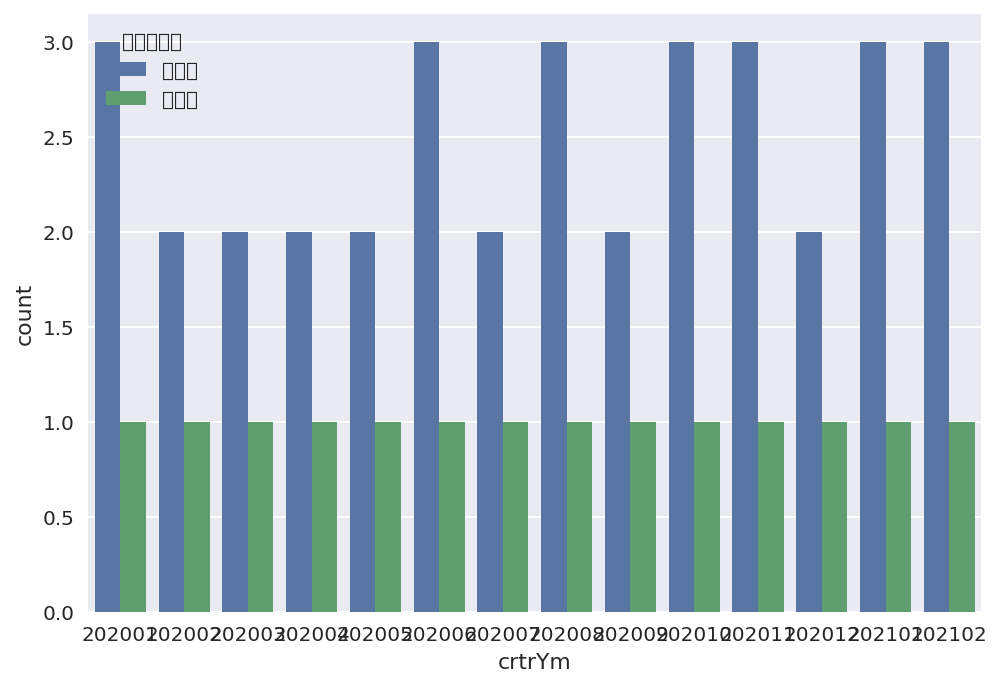

In [ ]:
sns.countplot('crtrYm', hue='돌봄구분명', data=df_childcare)

# 데이터 수집 : 병원현황
 - df_hospital

In [ ]:
df_hospital = pd.read_csv('/content/drive/MyDrive/Jeonju/data/전라북도 전주시_병원현황_20210215.csv', encoding='euc-kr')

In [ ]:
df_hospital['gu'] = df_hospital['의료기관주소(도로명)'].apply(lambda x: x.split(' ')[2])

In [ ]:
df_hospital.head()

,의료기관명,개설자명,의료기관우편번호(도로명),의료기관주소(도로명),병상수,전화번호,팩스번호,의료기관종별,Unnamed: 8,Unnamed: 9,Unnamed: 10,gu
0,우리노인전문병원,정*****,54876.0,전라북도 전주시 덕진구 정여립로 978 (만성동),166,063-210-3600,NaN,노인병원,NaN,NaN,NaN,덕진구
1,전주샘물아동병원,박*****,54969.0,"전라북도 전주시 완산구 세내로 285, 샘물아동병원 5층 (효자동3가)",50,063)230-7200,063-224-3550,병원,NaN,NaN,NaN,완산구
2,온누리안과병원,문*****,54972.0,"전라북도 전주시 완산구 백제대로 325, 온누리안과 (중화산동2가)",30,063)277-2774,NaN,병원,NaN,NaN,NaN,완산구
3,박종혁믿음병원,박*****,54969.0,전라북도 전주시 완산구 홍산로 250-0 (효자동3가),75,063-224-5100,NaN,병원,NaN,NaN,NaN,완산구
4,전주문병원,문*****,55082.0,"전라북도 전주시 완산구 용머리로 106-0, 0동 (효자동1가,전주문병원)",40,063286-0000,NaN,병원,NaN,NaN,NaN,완산구


In [ ]:
df_hospital['의료기관종별'].shape

(94,)

In [ ]:
df_hospital.pivot_table(index='의료기관종별', columns='gu', values='의료기관주소(도로명)', aggfunc='count')

gu,덕진구,완산구
의료기관종별,,
노인병원,1.0,NaN
병원,5.0,25.0
일반요양병원,16.0,18.0
종합병원,3.0,2.0
치과병원,1.0,1.0
한방병원,11.0,11.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_

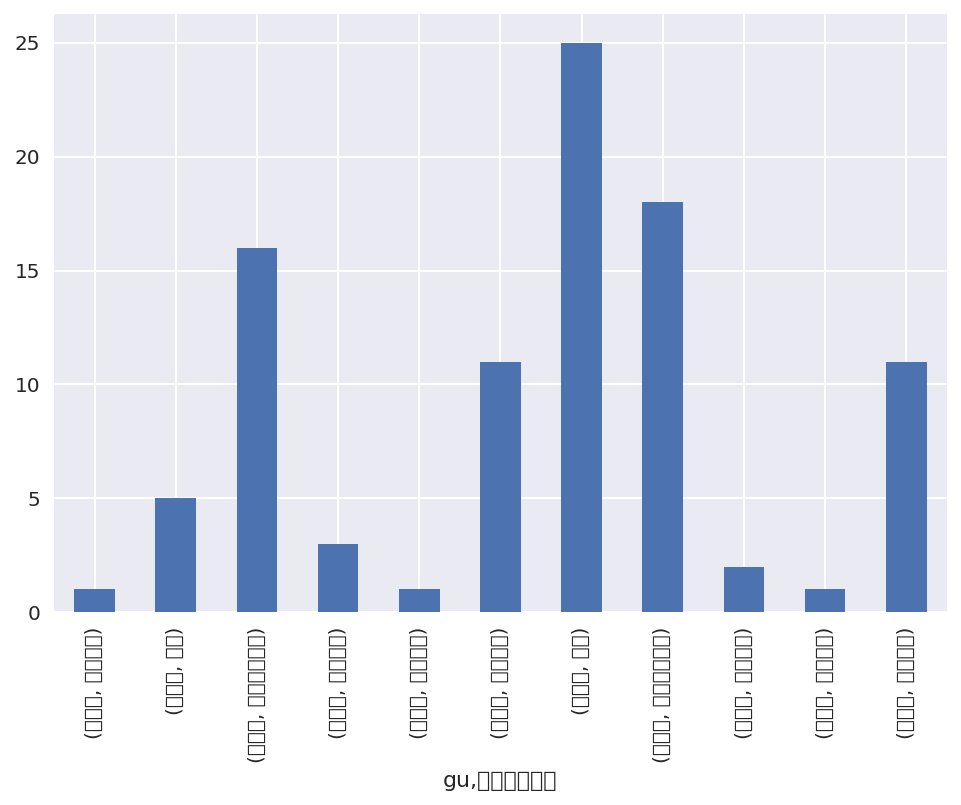

In [ ]:
df_hospital.groupby(['gu', '의료기관종별'], as_index=True)['의료기관명'].count().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_

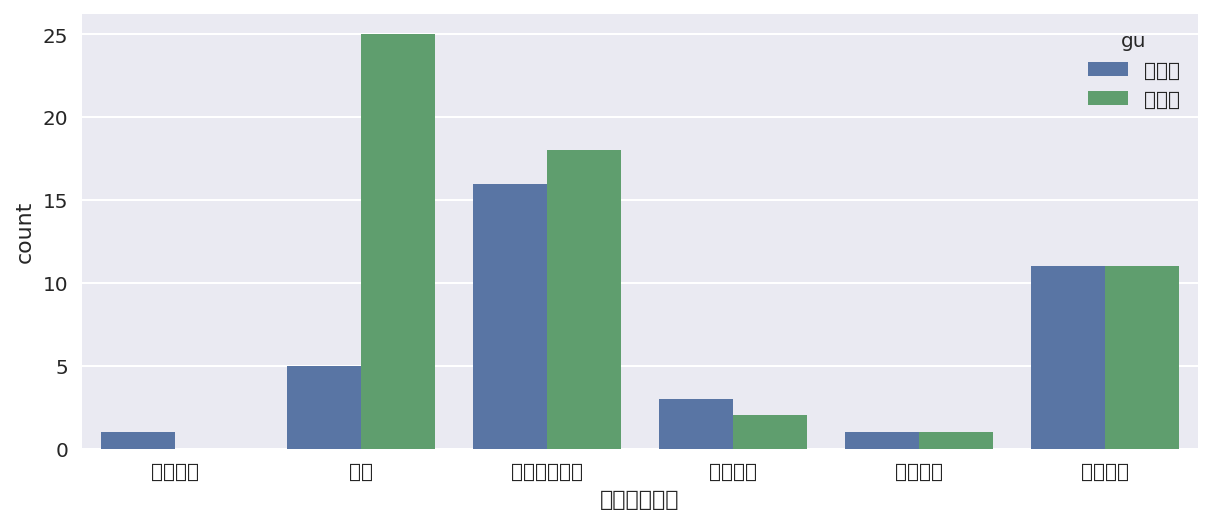

In [ ]:
f, ax = plt.subplots(1,1,figsize=(10,4))
sns.countplot('의료기관종별', hue='gu', data=df_hospital, ax=ax)
# for p in ax.patches:
#   print(p)
#   left, bottom, width, height = p.get_bbox().bounds
#   ax.annotate("%d"%(height), xy=(left+width/2, height*1.02), ha='center', color='gray', weight='bold')

# 데이터 수집 : 사회복지관현황

In [ ]:
df_welfare_complex = pd.read_csv('/content/drive/MyDrive/Jeonju/data/전라북도 전주시_사회복지관현황_20201031.csv', encoding='cp949')

In [ ]:
df_welfare_complex.shape

(5, 10)

In [ ]:
df_welfare_complex.head()

,연번,복지관명칭,소재지도로명주소,위도,경도,소재지전화번호,이용대상,이용요금,운영법인,데이터기준일자
0,1,전북종합 사회복지관,전라북도 전주시 완산구 흑석로 70(평화1동),35.798063,127.149502,063-282-7230,지역주민 중 복지 욕구가 있는 저소득층 우선(정합이용시설),무료(일부 실비 부담),사회복지법인 초록우산 어린이 재단,2020-10-31
1,2,전주종합 사회복지관,전라북도 전주시 완산구 덕적골2길 10(평화1동),35.797408,127.139795,063-284-2733,지역주민 중 복지 욕구가 있는 저소득층 우선(정합이용시설),무료(일부 실비 부담),사회복지법인 삼동회,2020-10-31
2,3,학산종합 사회복지관,전라북도 전주시 완산구 모악로 4726-1(평화2동),35.791080,127.132120,063-223-9999,지역주민 중 복지 욕구가 있는 저소득층 우선(정합이용시설),무료(일부 실비 부담),우리모두사회적협동조합,2020-10-31
3,4,선너머종합 사회복지관,전라북도 전주시 완산구 선너머로 54(중화산1동),35.815305,127.130539,063-232-0334,지역주민 중 복지 욕구가 있는 저소득층 우선(정합이용시설),무료(일부 실비 부담),사회복지법인 전주가톨릭 사회복지회,2020-10-31
4,5,평화 사회복지관,전라북도 전주시 완산구 덕적골2길 25(평화동1가),35.796480,127.142261,063-285-4408,지역주민 중 복지 욕구가 있는 저소득층 우선(정합이용시설),무료(일부 실비 부담),사회복지법인 삼동회,2020-10-31


In [ ]:
df_welfare_complex['이용대상'].value_counts()

지역주민 중 복지 욕구가 있는 저소득층 우선(정합이용시설)    5
Name: 이용대상, dtype: int64

# 데이터 수집 : 사회복지시설

In [ ]:
df_welfare_fac = pd.read_excel('/content/drive/MyDrive/Jeonju/data/전주시청_사회복지시설현황(2021).xlsx', header=2)

In [ ]:
df_welfare_fac.head()

,연번,시설유형,관할동,시설명,주소,연락처,비고
0,1,가정폭력상담소,노송동,전주가정폭력상담소,완산구 노송광장로 7,282-3288,NaN
1,2,가정폭력상담소,완산동,전주여성의전화부설\n가정폭력상담소,완산구 매곡로 27,287-7325,NaN
2,3,가정폭력상담소,효자2동,새벽이슬가정폭력상담소,완산구 백제대로 167,223-3014,NaN
3,4,가정폭력피해자보호시설,NaN,전주여성의쉼터,비공개시설,비공개,NaN
4,5,가정폭력피해자보호시설,비공개,아시아이주여성쉼터,비공개시설,비공개,NaN


In [ ]:
def facility_category(x):
  ret = ''
  if '가정폭력' in x:
    ret = '가정폭력'
  elif '노인' in x or '요양' in x:
    ret = '노인요양'
  elif '아동' in x:
    ret = '아동'
  elif '장애인' in x:
    ret = '장애인'
  elif '다문화' in x:
    ret = '다문화'
  elif '성폭력' in x or '성매매' in x:
    ret = '성폭력'
  else:
    pass
  return ret

In [ ]:
df_welfare_fac['유형'] = df_welfare_fac['시설유형'].apply(lambda x: facility_category(x))

In [ ]:
df_welfare_fac['행정구'] = df_welfare_fac['주소'].apply(lambda x: '비공개시설' if '비공개' in x else x.replace('전주시','').strip().split(' ')[0].replace(' ',''))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_

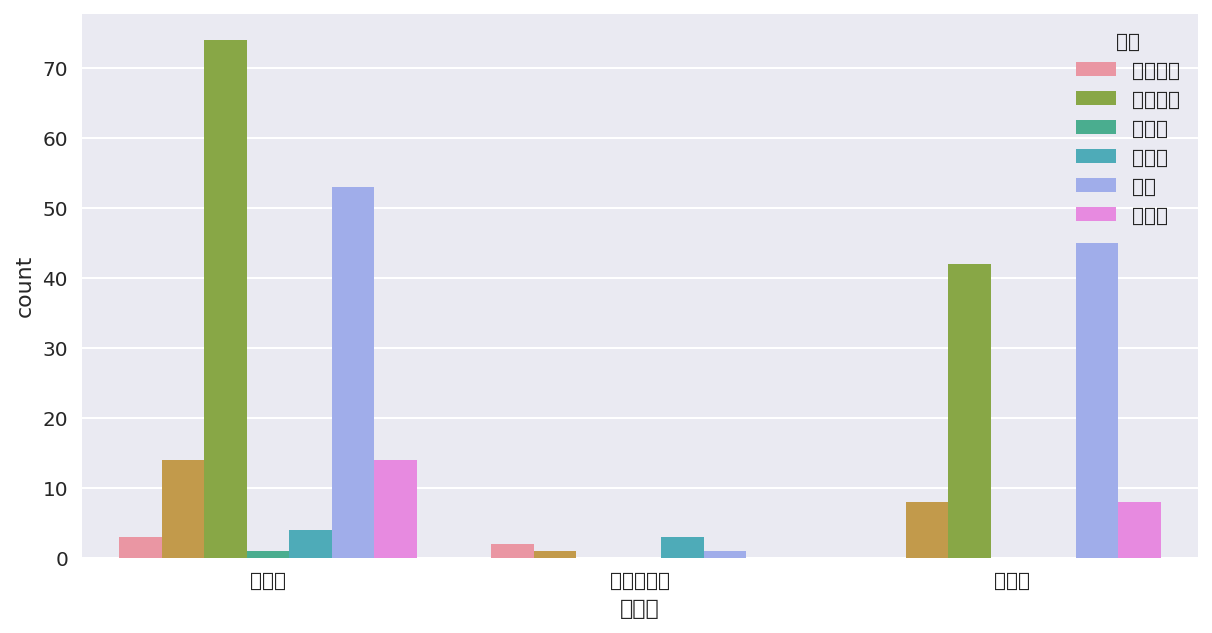

In [ ]:
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot('행정구', hue='유형', data=df_welfare_fac, ax=ax)

# 데이터 수집 : 장애인 복지시설


In [ ]:
df_disfacility = pd.read_csv('/content/drive/MyDrive/Jeonju/data/전라북도 전주시_장애인 복지시설 현황_20201221.csv', encoding='cp949')

In [ ]:
df_disfacility.head()

,순번,시설명,시설유형,종사자수,현원,설치일자,입소(이용)대상,도로명 주소,지번전체주소,운영주체,전화번호
0,1,동암재활원,장애인거주시설,15,38.0,1990-09-03,"지체, 뇌병변성인",전주시 완산구 천잠로 275(효자동3가),NaN,사회복지법인 동암,063-222-4444
1,2,소화진달네집,장애인거주시설,23,33.0,2006-04-28,지적장애인(성인여성),전주시 완산구 우림로 595-32(용복동),NaN,사회복지법인 소화자매원,063-222-2786
2,3,금선백련마을,장애인거주시설,26,30.0,2016-06-17,중증장애인,전주시 완산구 덕적골1길 18-3(평화동1가),NaN,사회복지법인 송광,063-236-0550
3,4,평안의집(개인시설),장애인거주시설,12,20.0,2008-12-01,지적장애(성인),전주시 완산구 선너머2길 29-15(중화산동2가),NaN,사회복지법인 평안한복지,063-282-7728
4,5,한마음단기보호센터,단기거주시설,5,10.0,2002-03-27,장애인,전주시 완산구 계룡산길 44-8(삼천동2가),NaN,사)전라북도장애인부모회,063-224-6678


# 데이터 수집 : 아동복지시설현황
- df_adong

In [ ]:
df_adong = pd.read_csv('/content/drive/MyDrive/Jeonju/data/전라북도 전주시_아동복지시설현황_20201106.csv', encoding='cp949')

In [ ]:
df_adong.shape

(23, 9)

In [ ]:
df_adong.head()

,번호,시설명,소재지전화번호,정원,운영방법,소재지도로명주소,위도,경도,데이터기준일자
0,1,전주 영아원,063-222-1559,39,법인,전라북도 전주시 완산구 중산2길 7,35.814686,127.121052,2020-11-06
1,2,호성 보육원,063-211-8582,80,법인,전라북도 전주시 덕진구 추천로 217-28,35.855756,127.112195,2020-11-06
2,3,삼성 휴먼빌,063-221-7001,45,법인,전라북도 전주시 완산구 만지길 20-15,35.821512,127.091196,2020-11-06
3,4,삼성자립 생활관,063-221-7002,30,법인,전라북도 전주시 완산구 만지길 24,35.821512,127.091196,2020-11-06
4,5,우리집 그룹홈,063-288-1091,7,개인,전라북도 전주시 완산구 오정2길 22-7,35.834390,127.060512,2020-11-06


# 데이터 연계 : 경찰서 및 지구대 현황
- df_police

In [ ]:
# 경찰서 및 지구대 현황
base = 'http://openapi.jeonju.go.kr/rest/patroldiv/getPatrolDivList?serviceKey=V3pgDw4Na%2BC2XkjtjQzQ1Co6xR9HCnU3pJw4lPUNX4TU3RdZXu7%2FX60NUnj9UOWrbTpukrfudRi1baplWwp7%2BQ%3D%3D&authApiKey=-&pageSize=100'
# 아동복지시설현황 서비스
# base = 'http://openapi.jeonju.go.kr/rest/childwelfare/getChildwelfareList?serviceKey=V3pgDw4Na%2BC2XkjtjQzQ1Co6xR9HCnU3pJw4lPUNX4TU3RdZXu7%2FX60NUnj9UOWrbTpukrfudRi1baplWwp7%2BQ%3D%3D&numOfRows=100'
parameters = ''
url = base 

header = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"}
request = Request(url, headers=header)
response = urlopen(request)
rescode = response.getcode()

if rescode == 200:
  response_body = response.read().decode('utf-8')
else:
  print('error code : {}'.format(rescode))

jsonData = json.loads(json.dumps(xmltodict.parse(response_body)))
df_police = pd.DataFrame(jsonData['rfcOpenApi']['body']['data']['list'])

In [ ]:
df_police.dtypes

activeCnt         object
memberCnt         object
name              object
patrolAddr        object
patrolCategory    object
patrolDong        object
patrolSid         object
patrolTel         object
patrolTitle       object
posx              object
posy              object
dtype: object

In [ ]:
df_police.shape

(48, 11)

In [ ]:
df_police['posx'] = df_police['posx'].astype(float)
df_police['posy'] = df_police['posy'].astype(float)

# 데이터 수집 : 경로당

In [ ]:
df_seniorHall = pd.read_csv('/content/drive/MyDrive/Jeonju/data/전라북도 전주시_경로당 현황_20210331.csv', encoding='cp949')

In [ ]:
df_seniorHall.head()

,시설명,전화번호,소재지,관할행정동,관리기관 전화번호,관리기관명,데이터기준일자
0,다가제일경로당,284-7628,전주시 완산구 전주천동로 200-50(다가동2가),중앙동,063-220-5378,전주시 완산구청,2021-03-31
1,태평 2경로당,272-3691,전주시 완산구 물레방아1길 43-68(태평동),중앙동,063-220-5378,전주시 완산구청,2021-03-31
2,태평 1경로당,275-6833,전주시 완산구 공북로67-5(태평동),중앙동,063-220-5378,전주시 완산구청,2021-03-31
3,연수정경로당,284-5273,전주시 완산구 전라감영5길 19-11(중앙동3가),중앙동,063-220-5378,전주시 완산구청,2021-03-31
4,일심자모경로당,284-2895,전주시 완산구 전주객사2길 46-8(고사동),중앙동,063-220-5378,전주시 완산구청,2021-03-31


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: Runtime

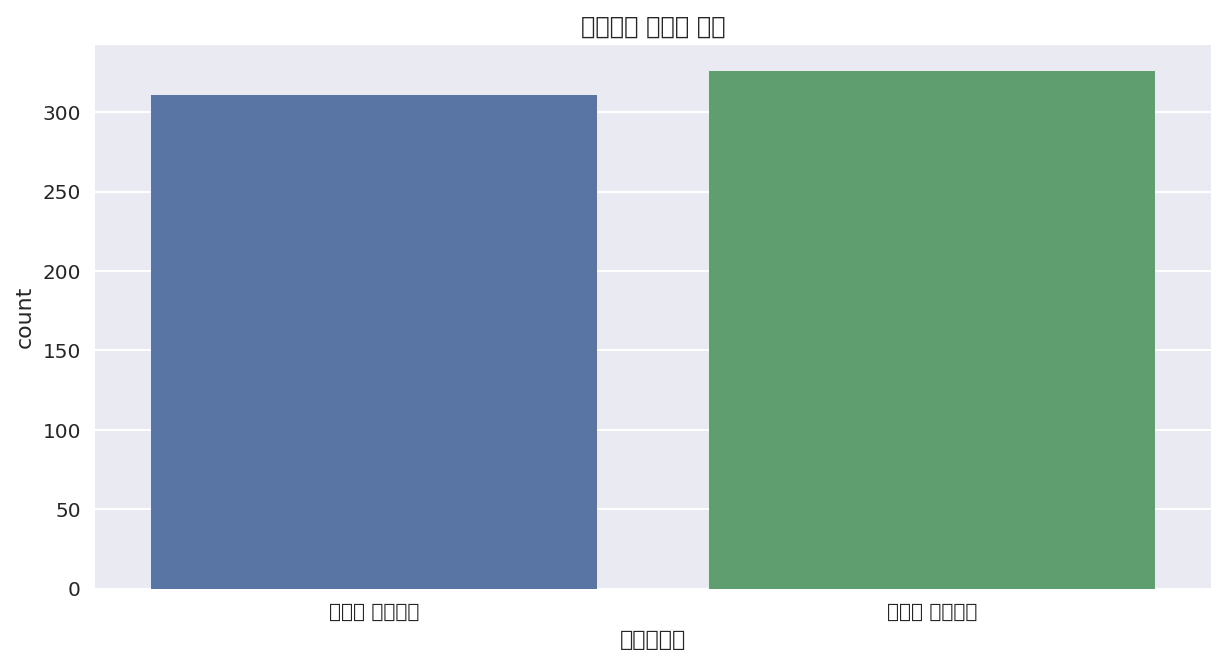

In [ ]:
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot('관리기관명', data=df_seniorHall, ax=ax)
ax.set_title('행정구별 경로당 갯수')
plt.show()

# 데이터 수집 : 전북어린이보호구역공간위치정보(전북빅데이터허브)

In [ ]:
df_cross = pd.read_csv('/content/drive/MyDrive/Jeonju/data/전북빅데이터허브/전북어린이보호구역공간위치정보/횡단보도.csv', sep='\t', encoding='cp949')

In [ ]:
df_cross.head()

,OBJECTID,SCHOOL_NM,SHAPE_AREA,geometry
0,1,전주만성초등학교,119.3770,"POLYGON ((205822.0649776702 259842.6593944885,..."
1,2,전주만성초등학교,138.9030,"POLYGON ((205831.1236218332 259848.8639452851,..."
2,3,전주만성초등학교,58.3221,"POLYGON ((205862.0222848002 259831.4912030546,..."
3,4,전주만성초등학교,112.6100,"POLYGON ((205830.9995308173 259817.7171002862,..."
4,5,전주만성초등학교,114.4270,"POLYGON ((205827.7731644031 259823.0530139713,..."


In [ ]:
df_cross.shape

(4482, 4)

In [ ]:
df_cross.dtypes

OBJECTID        int64
SCHOOL_NM      object
SHAPE_AREA    float64
geometry       object
dtype: object

In [ ]:
# df_cross.drop(df_cross[df_cross['geometry'].str.contains('MULTI')].index, inplace=True)

In [ ]:
# # 삽질코드
# # Projection 정의
# # 중부원점(Bessel): 서울 등 중부지역 EPSG:2097
# proj_1 = Proj(init='epsg:5181')
# # WGS84 경위도: GPS가 사용하는 좌표계 EPSG:4326
# proj_2 = Proj(init='epsg:4326')

# def coordinate(polygon):
#   position = polygon.replace('POLYGON ((','').replace('))','').replace(', ', ',').split(',')
#   position_list = []
#   for pos in position:
#     x = pos.split(' ')[0]
#     y = pos.split(' ')[0]
#     # print(x, y)
#     x_, y_ = transform(proj_1, proj_2, x, y)
#     position_list.append([x_, y_])
#   print(Polygon([[p[0], p[1]] for p in position_list]))
#   return Polygon([[p[0], p[1]] for p in position_list])

# df_cross['geometry'] = df_cross.loc[0:5, 'geometry'].apply(lambda x: coordinate(str(x)))

In [ ]:
df_cross['geom'] = df_cross['geometry'].apply(loads)

In [ ]:
df_geo = gpd.GeoDataFrame(df_cross['geom'], geometry='geom', crs=from_epsg(5181))

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
df_geo.dtypes

geom    geometry
dtype: object

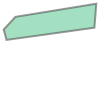

In [ ]:
df_geo.loc[1, 'geom']

In [ ]:
# df_geo2 = df_geo.to_crs(epsg=5174)
# df_geo2.plot()

In [ ]:
print(df_geo.crs)

+init=epsg:5181 +no_defs +type=crs


In [ ]:
# df_geo.crs = {'init':'epsg:4326'} 

In [ ]:
df_geo.head()

,geom
0,"POLYGON ((205822.065 259842.659, 205828.270 25..."
1,"POLYGON ((205831.124 259848.864, 205852.467 25..."
2,"POLYGON ((205862.022 259831.491, 205868.227 25..."
3,"POLYGON ((205831.000 259817.717, 205853.460 25..."
4,"POLYGON ((205827.773 259823.053, 205854.453 25..."


In [ ]:
zoom = 10
m = folium.Map(location=(35.8693566, 127.1280942), zoom_start=zoom)
plugins.ScrollZoomToggler().add_to(m)

In [ ]:
style1 = {'fillColor': False, 'color': '#475974'}
folium.GeoJson(data=df_geo.loc[:, 'geom'],style_function=lambda x:style1).add_to(m)
m

- 어린이 거주인구

In [ ]:
df_child = pd.read_csv('/content/drive/MyDrive/Jeonju/data/전북빅데이터허브/전북어린이보호구역공간위치정보/어린이 거주인구.csv', encoding='cp949', sep='\t')

In [ ]:
df_child.head()

,OBJECTID,GRID,VAL,SHAPE_AREA,geometry
0,1,나마905339,8.0,10005.049495,"POLYGON ((135769.4461839223 233352.1268734879,..."
1,2,다마022590,6.0,10005.647567,"POLYGON ((147345.01240985 258519.1977970829, 1..."
2,3,다마026570,7.0,10005.666946,"POLYGON ((147755.3512940009 256520.6341902941,..."
3,4,다마027570,6.0,10005.671549,"POLYGON ((147855.3816767264 256521.1449520762,..."
4,5,다마039566,10.0,10005.728733,"POLYGON ((149057.7900959519 256127.1520048065,..."


In [ ]:
style1 = {'fillColor': False, 'color': '#475974'}
style2 = {'fillColor': '#ED9253', 'color': '#ED9253'}


# folium.GeoJson(data=df_child["geometry"], style_function=lambda x:style1).add_to(m) #오산시경계
# for i in range(len(data9)):
#     folium.Circle(
#         location=[data9.iloc[i]['보호구역_위도'], data9.iloc[i]['보호구역_경도']],
#         color='#6B5149',
#         radius=3,
#     ).add_to(m)

# 지도시각화


> https://github.com/vuski/admdongkor

> https://dailyheumsi.tistory.com/m/144?category=854906

> https://dailyheumsi.tistory.com/85





In [ ]:
df_geo = gpd.read_file('/content/drive/MyDrive/contest/Jeonju/HangJeongDong_ver20210101.geojson')

DriverError: ignored

In [ ]:
df_geo = df_geo[df_geo['sidonm']=='전라북도']

In [ ]:
df_geo_dukjin = df_geo[df_geo['sggnm']=='전주시덕진구']

In [ ]:
df_geo_wansan = df_geo[df_geo['sggnm']=='전주시완산구']

In [ ]:
df_geo.head()

In [ ]:
zoom = 12
m = folium.Map(location=(35.8693566, 127.1280942), zoom_start=zoom)
plugins.ScrollZoomToggler().add_to(m)

In [ ]:
style1 = {'fillColor': False, 'color': '#475974'}
style2 = {'fillColor': False, 'color': '#EE9911'}

folium.GeoJson(df_geo_dukjin,style_function=lambda x:style1).add_to(m)
folium.GeoJson(df_geo_wansan,style_function=lambda x:style2).add_to(m)

- 경찰서, 지구대

In [ ]:
for lat, lng, value in zip(df_police['posy'], df_police['posx'], df_police['patrolDong']):
  folium.Marker(
    location=[lat,lng],
    popup=str(value),
    tooltip=str(value),
    icon=folium.Icon(icon = 'flag', color = 'red')
  ).add_to(m)
# m

- 아동복지시설현황

In [ ]:
for lat, lng, value in zip(df_adong['위도'], df_adong['경도'], df_adong['시설명']):
  folium.Marker(
    location=[lat,lng],
    popup=str(value),
    tooltip=str(value),
    icon=folium.Icon(icon = 'flag', color = 'blue')
  ).add_to(m)
# m

- 사회복지관

In [ ]:
for lat, lng, value in zip(df_welfare_complex['위도'], df_welfare_complex['경도'], df_welfare_complex['복지관명칭']):
  folium.Marker(
    location=[lat,lng],
    popup=str(value),
    tooltip=str(value),
    icon=folium.Icon(icon = 'flag', color = 'green')
  ).add_to(m)
m